# Quantile Regression

[scikit-learn](http://scikit-learn.org/stable/) does not have a quantile regression. [mlinsights](http://www.xavierdupre.fr/app/mlinsights/helpsphinx/index.html) implements a version of it.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Simple example

We generate some dummy data.

In [3]:
import numpy
X = numpy.random.random(1000)
eps1 = (numpy.random.random(900) - 0.5) * 0.1
eps2 = (numpy.random.random(100)) * 10
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1000, 1))
Y = X.ravel() * 3.4 + 5.6 + eps

In [4]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
from mlinsights.mlmodel import QuantileLinearRegression
clq = QuantileLinearRegression()
clq.fit(X, Y)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=10, n_jobs=1, normalize=False, quantile=0.5,
             verbose=False)

In [6]:
from pandas import DataFrame
data= dict(X=X.ravel(), Y=Y, clr=clr.predict(X), clq=clq.predict(X))
df = DataFrame(data)
df.head()

,X,Y,clr,clq
0,0.144425,6.082767,6.574576,6.097000
1,0.861817,8.501194,9.084144,8.538978
2,0.852068,8.448698,9.050038,8.505790
3,0.537455,7.450593,7.949466,7.434860
4,0.644438,7.750598,8.323712,7.799026


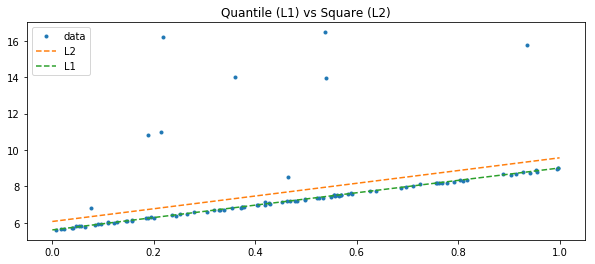

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
y1 = clr.predict(xx)
y2 = clq.predict(xx)
ax.plot(xx, y1, "--", label="L2")
ax.plot(xx, y2, "--", label="L1")
ax.set_title("Quantile (L1) vs Square (L2)");
ax.legend();

The L1 is clearly less sensible to extremas. The optimization algorithm is based on [Iteratively reweighted least squares](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares). It estimates a linear regression with error L2 then reweights each oberservation with the inverse of the error L1.

In [8]:
clq = QuantileLinearRegression(verbose=True, max_iter=20)
clq.fit(X, Y)

[QuantileLinearRegression.fit] iter=1 error=936.9769938504825
[QuantileLinearRegression.fit] iter=2 error=578.9089903748937
[QuantileLinearRegression.fit] iter=3 error=544.2554670171401
[QuantileLinearRegression.fit] iter=4 error=543.505934174343
[QuantileLinearRegression.fit] iter=5 error=543.1205243355472
[QuantileLinearRegression.fit] iter=6 error=542.8188531012216
[QuantileLinearRegression.fit] iter=7 error=542.4979898049872
[QuantileLinearRegression.fit] iter=8 error=542.284443296495
[QuantileLinearRegression.fit] iter=9 error=542.1285744886524
[QuantileLinearRegression.fit] iter=10 error=542.0493119577133
[QuantileLinearRegression.fit] iter=11 error=541.973677290766
[QuantileLinearRegression.fit] iter=12 error=541.933302702951
[QuantileLinearRegression.fit] iter=13 error=541.9080513258444
[QuantileLinearRegression.fit] iter=14 error=541.8864385753501
[QuantileLinearRegression.fit] iter=15 error=541.8724748022115
[QuantileLinearRegression.fit] iter=16 error=541.8607775980527
[Quan

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=20, n_jobs=1, normalize=False, quantile=0.5,
             verbose=True)

In [9]:
clq.score(X,Y)

0.5418331790375418

## Regression with various quantiles

In [10]:
import numpy
X = numpy.random.random(1200)
eps1 = (numpy.random.random(900) - 0.5) * 0.5
eps2 = (numpy.random.random(300)) * 2
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1200, 1))
Y = X.ravel() * 3.4 + 5.6 + eps + X.ravel() * X.ravel() * 8

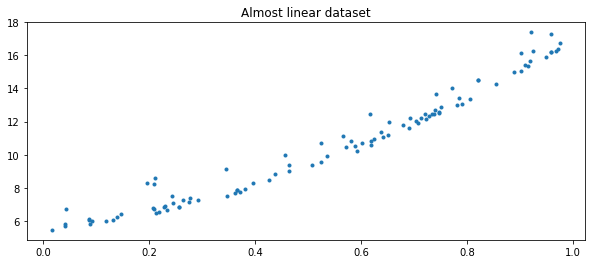

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
ax.set_title("Almost linear dataset");

In [12]:
clqs = {}
for qu in [0.1, 0.25, 0.5, 0.75, 0.9]:
    clq = QuantileLinearRegression(quantile=qu)
    clq.fit(X, Y)
    clqs['q=%1.2f' % qu] = clq

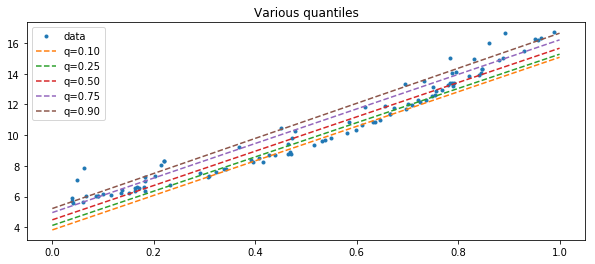

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
for qu in sorted(clqs):
    y = clqs[qu].predict(xx)
    ax.plot(xx, y, "--", label=qu)
ax.set_title("Various quantiles");
ax.legend();